<a href="https://www.kaggle.com/code/nizarbousabat/movie-recommendation-system-project?scriptVersionId=214635121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/nizarbousabat/movie-recommendation-system-project?scriptVersionId=214326625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zipcodes-county-fips-crosswalk/ZIP-COUNTY-FIPS_2017-06.csv
/kaggle/input/movielens-100k-dataset/ml-100k/u.occupation
/kaggle/input/movielens-100k-dataset/ml-100k/u1.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.info
/kaggle/input/movielens-100k-dataset/ml-100k/u4.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.item
/kaggle/input/movielens-100k-dataset/ml-100k/README
/kaggle/input/movielens-100k-dataset/ml-100k/u1.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.data
/kaggle/input/movielens-100k-dataset/ml-100k/u5.test
/kaggle/input/movielens-100k-dataset/ml-100k/mku.sh
/kaggle/input/movielens-100k-dataset/ml-100k/u5.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.user
/kaggle/input/movielens-100k-dataset/ml-100k/ub.base
/kaggle/input/movielens-100k-dataset/ml-100k/u4.base
/kaggle/input/movielens-100k-dataset/ml-100k/u2.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.base
/kaggle/input/movielens-100

## Reading the main datasets

In [2]:
df = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.data', sep='\t', header=None, names=['user_id', 'movie_id', 'rating','timestamp'])

In [3]:
df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df_info=pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.info', sep='\t', header=None)

In [6]:
df_info.head()

,0
0,943 users
1,1682 items
2,100000 ratings


In [7]:
column_names = [ 'movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ] 
# Read the file 
df_items = pd.read_csv( '/kaggle/input/movielens-100k-dataset/ml-100k/u.item', sep='|', header=None, names=column_names, encoding='ISO-8859-1' )

In [8]:
df_items.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df_genre=pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.genre', sep='|', header=None)

In [10]:
df_genre.head()

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [11]:
df_user= pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.user', sep='|', header=None, names=['user_id','age','gender','occupation','zip code'])

In [12]:
df_user.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Merging tables

#### Here we will merge all the table in one table so we can see the relationship between users and movies

In [13]:
df_merged1 = pd.merge(df, df_user, on='user_id', how='inner')

In [14]:
df_merged1.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,186,302,3,891717742,39,F,executive,00000
2,22,377,1,878887116,25,M,writer,40206
3,244,51,2,880606923,28,M,technician,80525
4,166,346,1,886397596,47,M,educator,55113


In [15]:
df_merged1.shape

(100000, 8)

In [16]:
df_merged = pd.merge(df_merged1, df_items, on='movie_id', how='inner')

## Explore the merged data

In [17]:
df_merged.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   movie_id            100000 non-null  int64  
 2   rating              100000 non-null  int64  
 3   timestamp           100000 non-null  int64  
 4   age                 100000 non-null  int64  
 5   gender              100000 non-null  object 
 6   occupation          100000 non-null  object 
 7   zip code            100000 non-null  object 
 8   movie_title         100000 non-null  object 
 9   release_date        99991 non-null   object 
 10  video_release_date  0 non-null       float64
 11  IMDb_URL            99987 non-null   object 
 12  unknown             100000 non-null  int64  
 13  Action              100000 non-null  int64  
 14  Adventure           100000 non-null  int64  
 15  Animation           100000 non-null

#### we see that there are some nan values that we need to clear

## Clean the data

In [19]:
df_cleaned = df_merged.dropna(axis=1, how='all')

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  int64 
 1   movie_id      100000 non-null  int64 
 2   rating        100000 non-null  int64 
 3   timestamp     100000 non-null  int64 
 4   age           100000 non-null  int64 
 5   gender        100000 non-null  object
 6   occupation    100000 non-null  object
 7   zip code      100000 non-null  object
 8   movie_title   100000 non-null  object
 9   release_date  99991 non-null   object
 10  IMDb_URL      99987 non-null   object
 11  unknown       100000 non-null  int64 
 12  Action        100000 non-null  int64 
 13  Adventure     100000 non-null  int64 
 14  Animation     100000 non-null  int64 
 15  Children's    100000 non-null  int64 
 16  Comedy        100000 non-null  int64 
 17  Crime         100000 non-null  int64 
 18  Documentary   100000 non-

In [21]:
df_cleaned = df_cleaned.dropna()

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99987 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       99987 non-null  int64 
 1   movie_id      99987 non-null  int64 
 2   rating        99987 non-null  int64 
 3   timestamp     99987 non-null  int64 
 4   age           99987 non-null  int64 
 5   gender        99987 non-null  object
 6   occupation    99987 non-null  object
 7   zip code      99987 non-null  object
 8   movie_title   99987 non-null  object
 9   release_date  99987 non-null  object
 10  IMDb_URL      99987 non-null  object
 11  unknown       99987 non-null  int64 
 12  Action        99987 non-null  int64 
 13  Adventure     99987 non-null  int64 
 14  Animation     99987 non-null  int64 
 15  Children's    99987 non-null  int64 
 16  Comedy        99987 non-null  int64 
 17  Crime         99987 non-null  int64 
 18  Documentary   99987 non-null  int64 
 19  Drama    

#### we didn't lost so much data so it's ok to delete the nan values

In [23]:
df_cleaned["unknown"].head()

0    0
1    0
2    0
3    0
4    0
Name: unknown, dtype: int64

### we see that unknown column has zeros so we should delete it

In [24]:
df_cleaned= df_cleaned.drop(columns=['unknown'])

## checking for duplicates

In [25]:
duplicate_count = df_cleaned.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [26]:
df_cleaned.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


### Let's convert timestamp to datetime object

In [27]:
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'], unit='s') 


In [28]:
df_cleaned.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


### we will merge the data with zip_codes to get more geographical information

In [29]:
zip_codes=pd.read_csv("/kaggle/input/zipcodes-county-fips-crosswalk/ZIP-COUNTY-FIPS_2017-06.csv")

In [30]:
zip_codes.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [31]:
zip_codes["COUNTYNAME"].unique()

array(['Autauga County', 'Baldwin County', 'Barbour County', ...,
       'St. Croix Island', 'St. John Island', 'St. Thomas Island'],
      dtype=object)

### checking for duplicates and nan values

In [32]:
zip_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP         52889 non-null  int64 
 1   COUNTYNAME  52889 non-null  object
 2   STATE       52889 non-null  object
 3   STCOUNTYFP  52889 non-null  int64 
 4   CLASSFP     52889 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [33]:
duplicate_zips = zip_codes['ZIP'].duplicated().sum()
print(f'Number of duplicate ZIP codes: {duplicate_zips}')


Number of duplicate ZIP codes: 13433


### Removing duplicates from zip and merging it with the cleaned data

In [34]:
zip_codes = zip_codes.drop_duplicates(subset=['ZIP'])
df_cleaned['zip code'] = df_cleaned['zip code'].astype(str) 
zip_codes['ZIP'] = zip_codes['ZIP'].astype(str)
df_final = pd.merge(df_cleaned, zip_codes,left_on='zip code',right_on='ZIP', how='inner')

In [35]:
df_final.shape

(87620, 34)

In [36]:
df_cleaned.shape

(99987, 29)

### we will add a new feature to calculate the number of dates between release and rating

In [37]:
# Calculate time difference between rating date and release date
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], errors='coerce') 
df_final['release_date'] = pd.to_datetime(df_final['release_date'], errors='coerce')
df_final['days_since_release'] = (df_final['timestamp'] - df_final['release_date']).dt.days

In [38]:
df_final.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Sci-Fi,Thriller,War,Western,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP,days_since_release
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1997-01-24,...,0,0,0,0,55105,Ramsey County,MN,27123,H1,314
1,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994-01-01,...,0,0,0,0,40206,Jefferson County,KY,21111,H1,1406
2,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994-01-01,...,0,0,1,1,80525,Larimer County,CO,8069,H1,1426
3,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997-01-01,...,0,0,0,0,55113,Ramsey County,MN,27123,H1,397
4,115,265,2,1997-12-03 17:51:28,31,M,engineer,17110,"Hunt for Red October, The (1990)",1990-01-01,...,0,1,0,0,17110,Dauphin County,PA,42043,H1,2893


### we will now extract the release year

In [39]:
df_final['year_of_release'] = df_final['release_date'].dt.year

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87620 entries, 0 to 87619
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             87620 non-null  int64         
 1   movie_id            87620 non-null  int64         
 2   rating              87620 non-null  int64         
 3   timestamp           87620 non-null  datetime64[ns]
 4   age                 87620 non-null  int64         
 5   gender              87620 non-null  object        
 6   occupation          87620 non-null  object        
 7   zip code            87620 non-null  object        
 8   movie_title         87620 non-null  object        
 9   release_date        87620 non-null  datetime64[ns]
 10  IMDb_URL            87620 non-null  object        
 11  Action              87620 non-null  int64         
 12  Adventure           87620 non-null  int64         
 13  Animation           87620 non-null  int64     

In [41]:
df_final.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Thriller,War,Western,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP,days_since_release,year_of_release
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1997-01-24,...,0,0,0,55105,Ramsey County,MN,27123,H1,314,1997
1,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994-01-01,...,0,0,0,40206,Jefferson County,KY,21111,H1,1406,1994
2,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994-01-01,...,0,1,1,80525,Larimer County,CO,8069,H1,1426,1994
3,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997-01-01,...,0,0,0,55113,Ramsey County,MN,27123,H1,397,1997
4,115,265,2,1997-12-03 17:51:28,31,M,engineer,17110,"Hunt for Red October, The (1990)",1990-01-01,...,1,0,0,17110,Dauphin County,PA,42043,H1,2893,1990


In [42]:
df_final['rating'] = pd.to_numeric(df_final['rating'], downcast='unsigned')
df_final['age'] = pd.to_numeric(df_final['age'], downcast='unsigned')

# Visualisation part

### Plot 1:the count of ratings by age

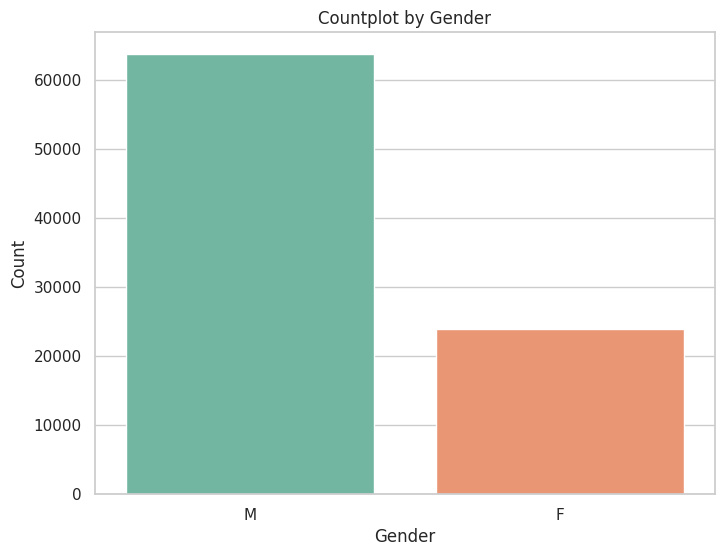

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_final, palette='Set2')

# Add title and labels
plt.title('Countplot by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

#### we see that males have more ratings in this dataset

### Plot 2: the number of ratings by occupation

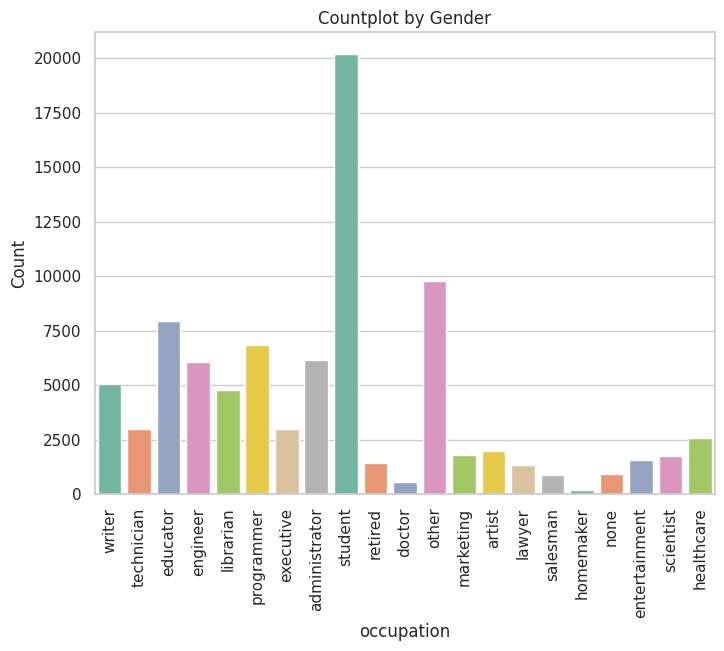

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='occupation', data=df_final, palette='Set2')

# Add title and labels
plt.xticks(rotation=90)
plt.title('Countplot by Gender')
plt.xlabel('occupation')
plt.ylabel('Count')

# Show the plot
plt.show()

#### we see that students are the most type who rated in this dataset

### Plot 3:the number of ratings by movie type

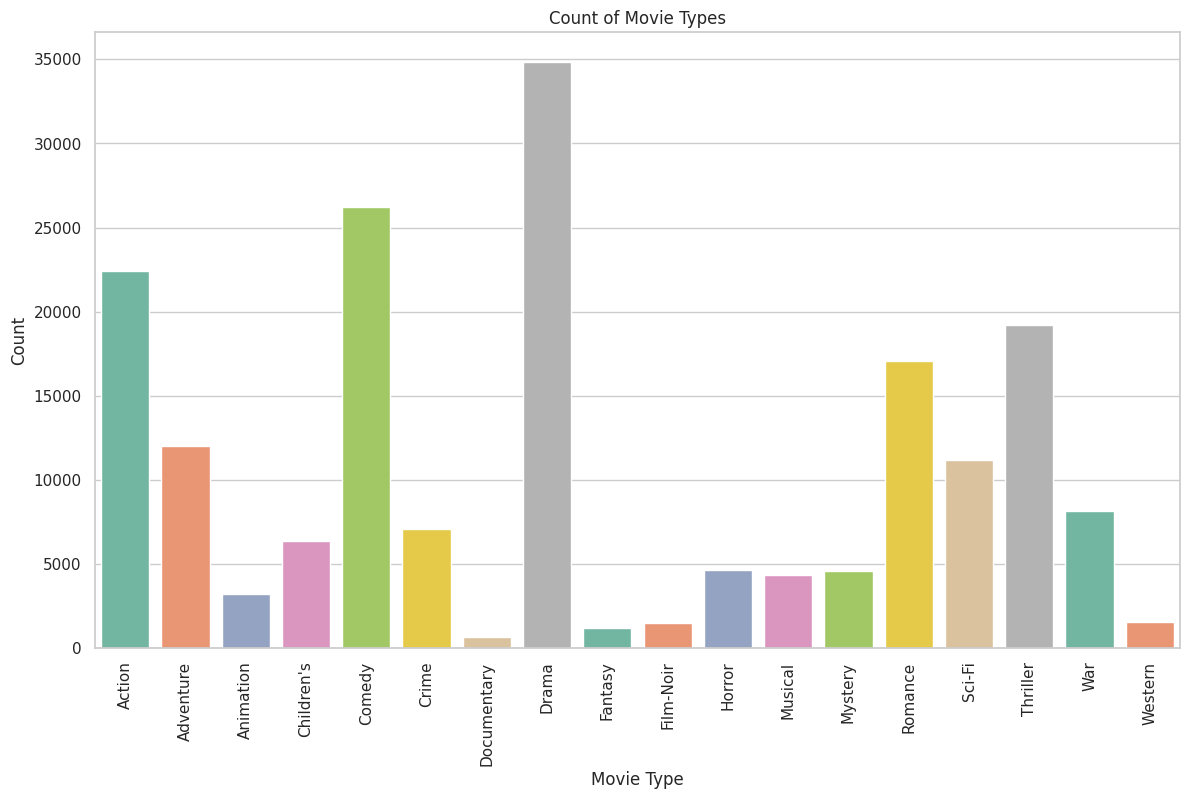

In [45]:
movie_type_columns = [ 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ]
df_movie_types = df_final[movie_type_columns]
movie_counts = df_movie_types.sum()
movie_counts = movie_counts.reset_index() 
movie_counts.columns = ['Movie_Type', 'Count'] 
# Plot the counts using Seaborn 
sns.set(style="whitegrid") 
plt.figure(figsize=(14, 8)) 
sns.barplot(x='Movie_Type', y='Count', data=movie_counts, palette='Set2') 
# Add title and labels
plt.xticks(rotation=90)
plt.title('Count of Movie Types') 
plt.xlabel('Movie Type') 
plt.ylabel('Count') 
# Rotate x-axis labels for better readability plt.xticks(rotation=45) 
# Show the plot 
plt.show()

#### we see that the top 3 are drama,comedy and action

### Plot 4:the number of users by age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


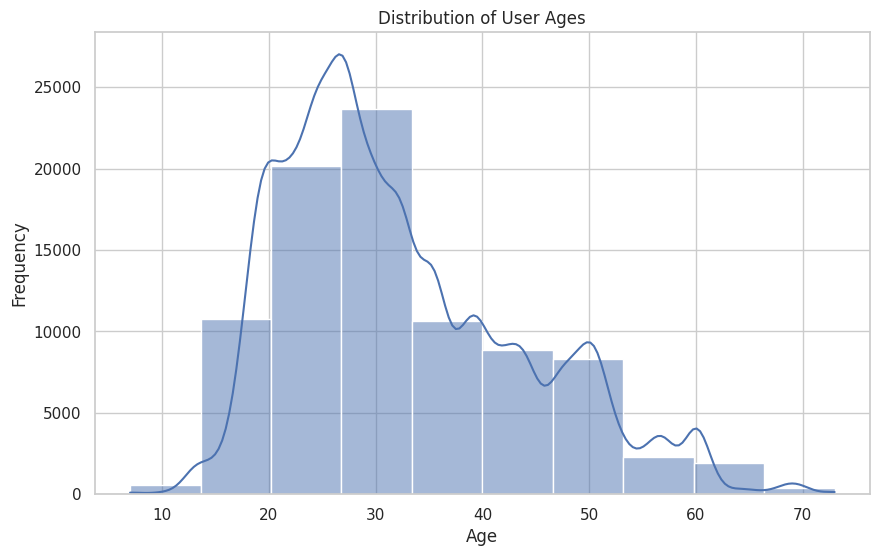

In [46]:
# Plot the distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(df_final['age'], bins=10, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


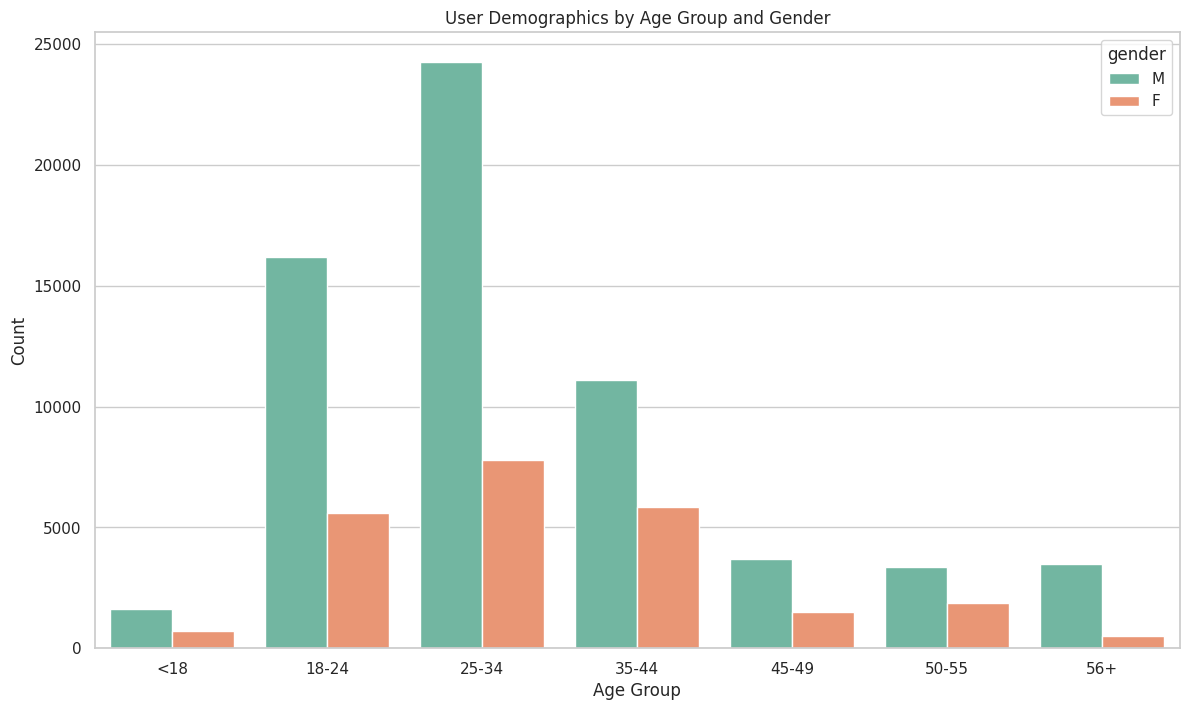

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age groups
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Plot the count of users by age group and gender
plt.figure(figsize=(14, 8))
sns.countplot(x='age_group', hue='gender', data=df_final, palette='Set2')
plt.title('User Demographics by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### we see that young people are the majortity in this dataset

### Plot 5: the most ratings given in this dataset

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


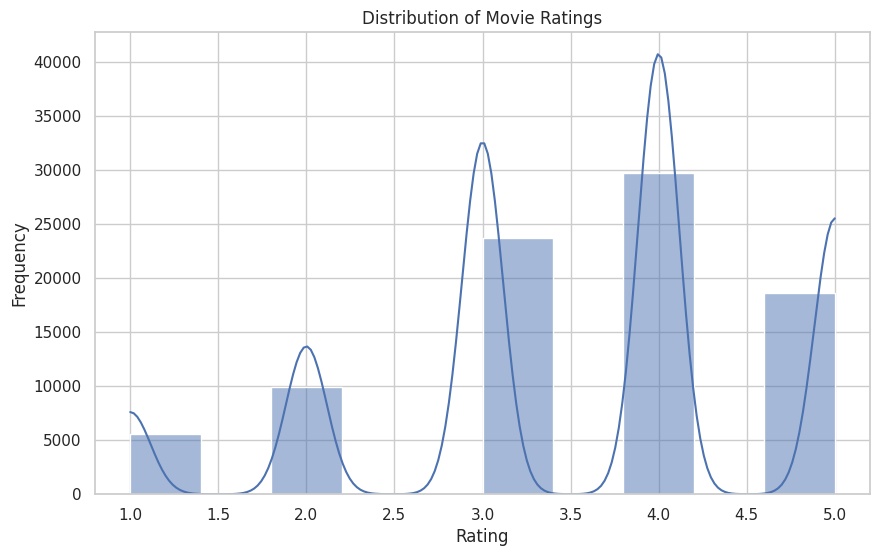

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Remove infinite values
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=['rating'])

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_final['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### we see that rating 4 is the most common rating in this dataset

### Plot 6:the number of ratings by gender

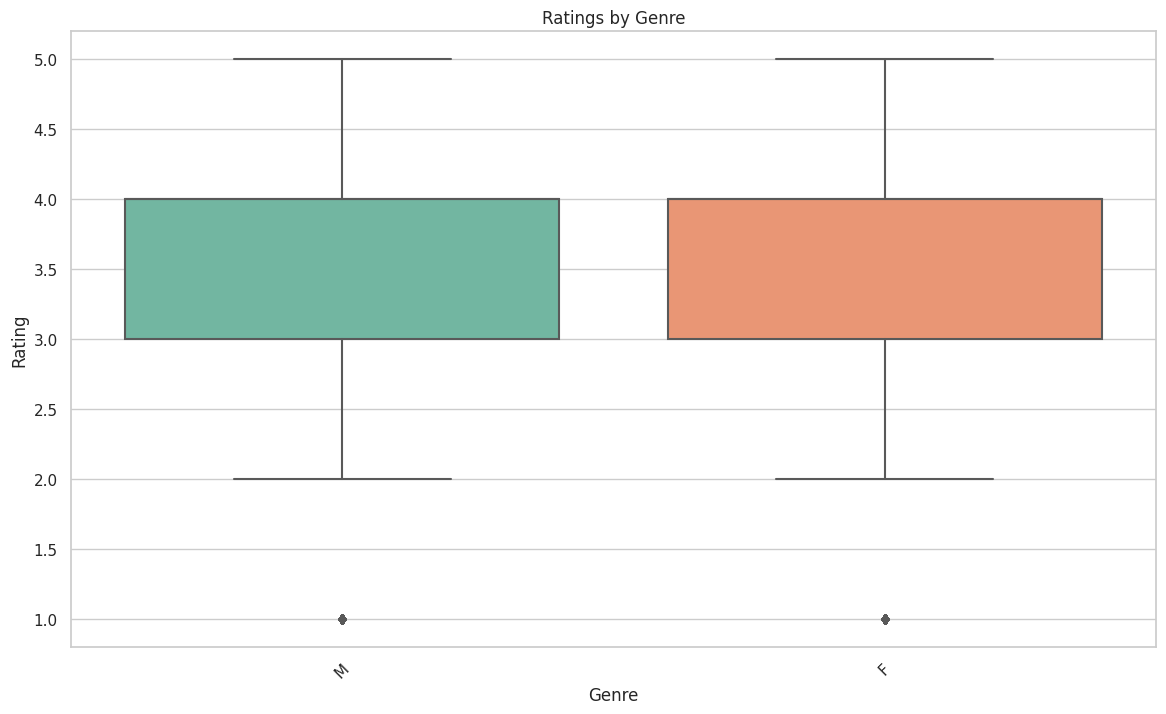

In [49]:

# Plot the ratings by genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='gender', y='rating', data=df_final, palette='Set2')
plt.title('Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


#### we see that both gender have the same distribution

### plot 7:the top 20 rated movies

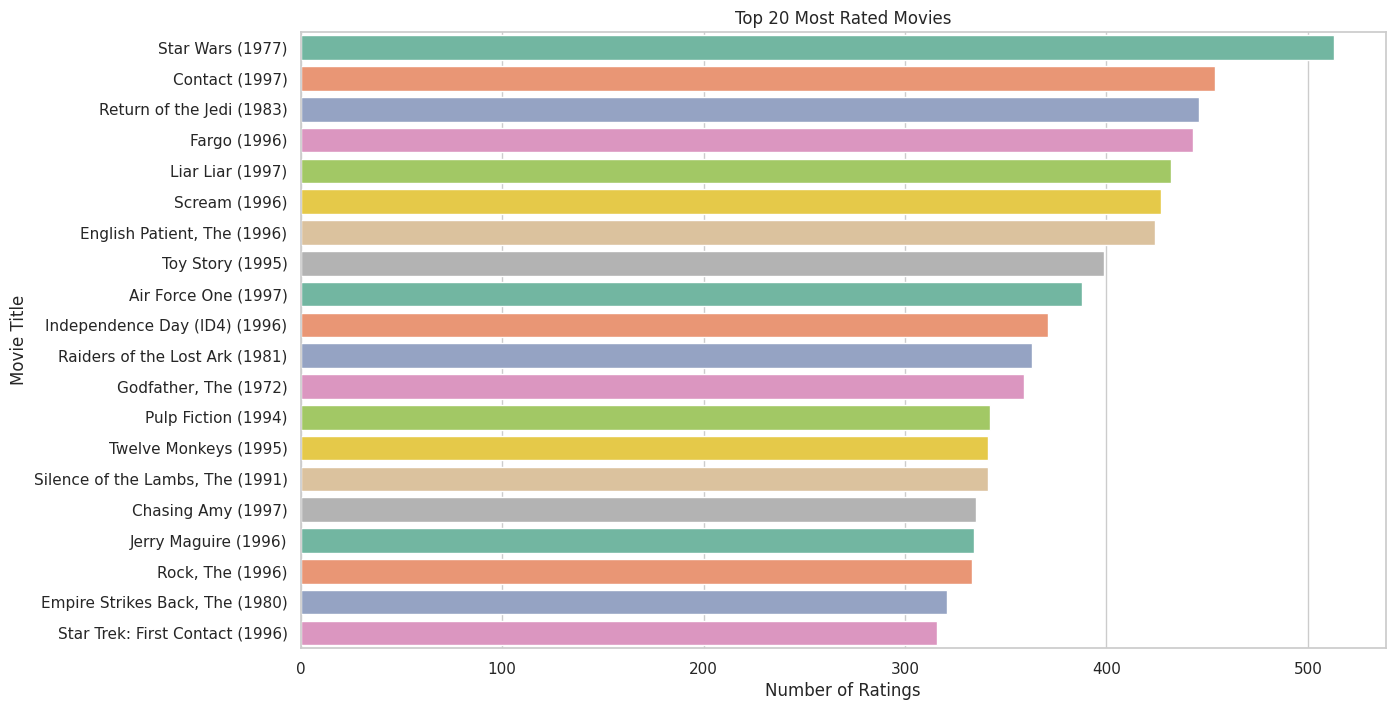

In [50]:
# Count the number of ratings for each movie
popular_movies = df_final['movie_title'].value_counts().reset_index()
popular_movies.columns = ['Movie Title', 'Count']

# Plot the most popular movies
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Movie Title', data=popular_movies.head(20), palette='Set2')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


### Plot 8:the highest rated movies

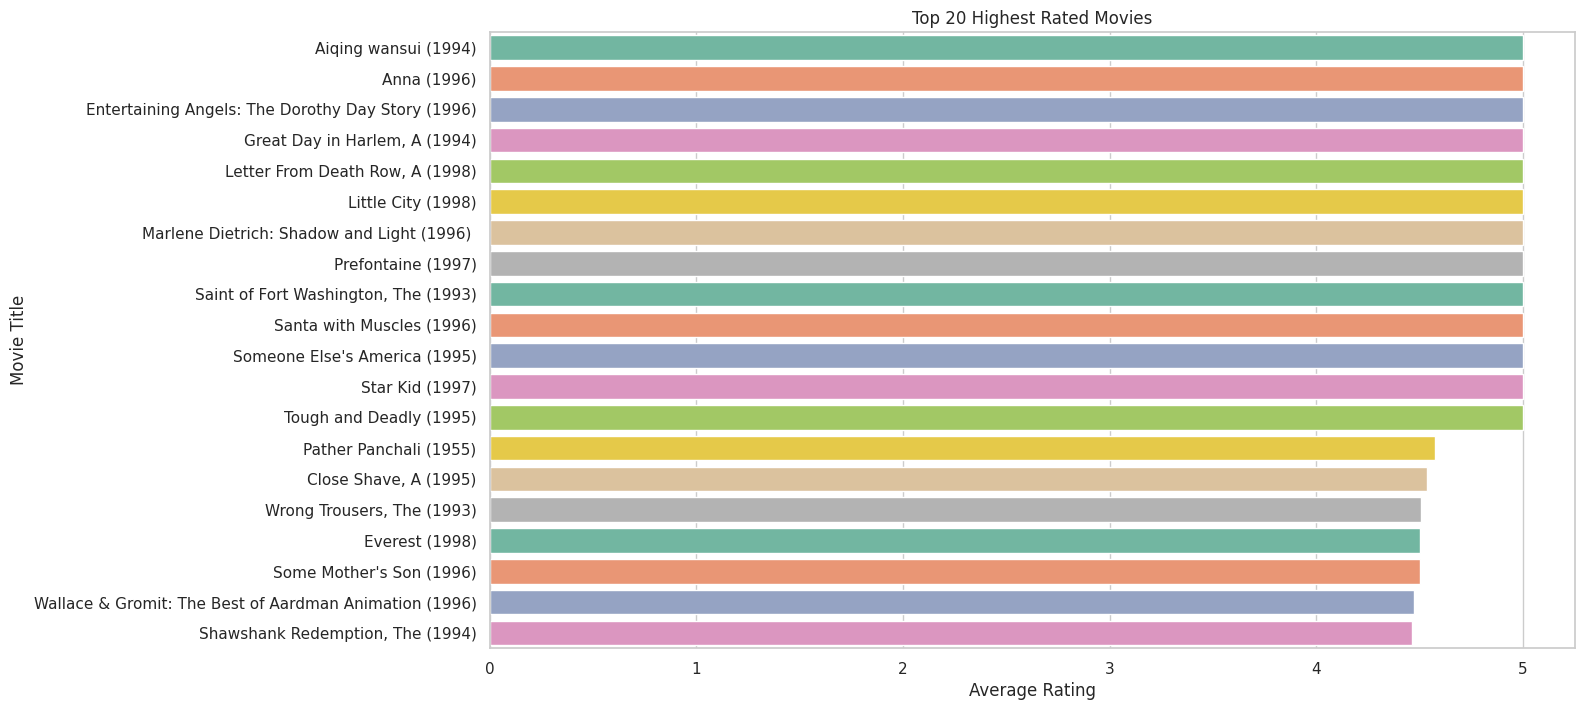

In [51]:
# Calculate the average rating for each movie
avg_ratings = df_final.groupby('movie_title')['rating'].mean().reset_index()
avg_ratings.columns = ['Movie Title', 'Average Rating']

# Plot the top 20 highest rated movies
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Rating', y='Movie Title', data=avg_ratings.nlargest(20, 'Average Rating'), palette='Set2')
plt.title('Top 20 Highest Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()


#### we cannot take so much information from that plot given that a movie can be rated only once 5

### Plot 9:Average rating for each genre

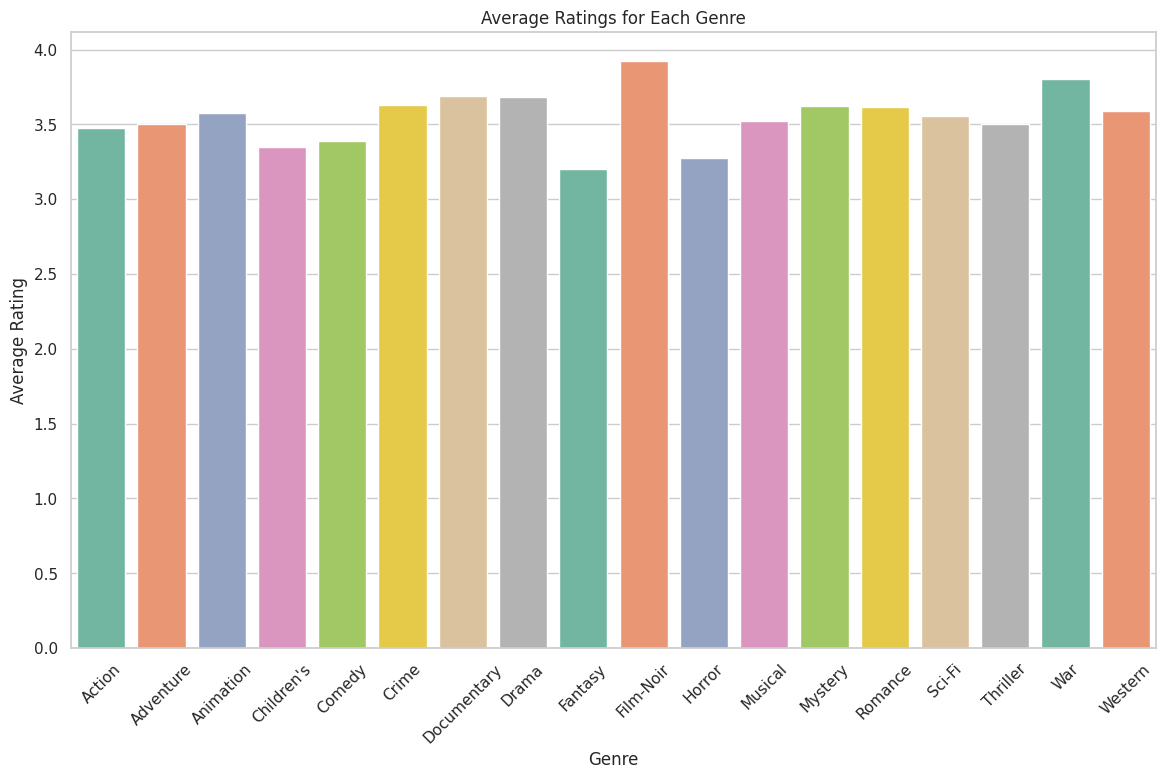

In [52]:

movie_genre_columns = [
    'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Calculate average ratings for each genre
genre_ratings = {}
for genre in movie_genre_columns:
    genre_ratings[genre] = df_final.loc[df_final[genre] == 1, 'rating'].mean()

# Convert the dictionary to a DataFrame for plotting
genre_ratings_df = pd.DataFrame(list(genre_ratings.items()), columns=['Genre', 'Average Rating'])

# Plot the average ratings for each genre
plt.figure(figsize=(14, 8))
sns.barplot(x='Genre', y='Average Rating', data=genre_ratings_df, palette='Set2')
plt.title('Average Ratings for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


#### we see that war and drama have the highest rating average

### Plot 10:Average rating by genre for each gender

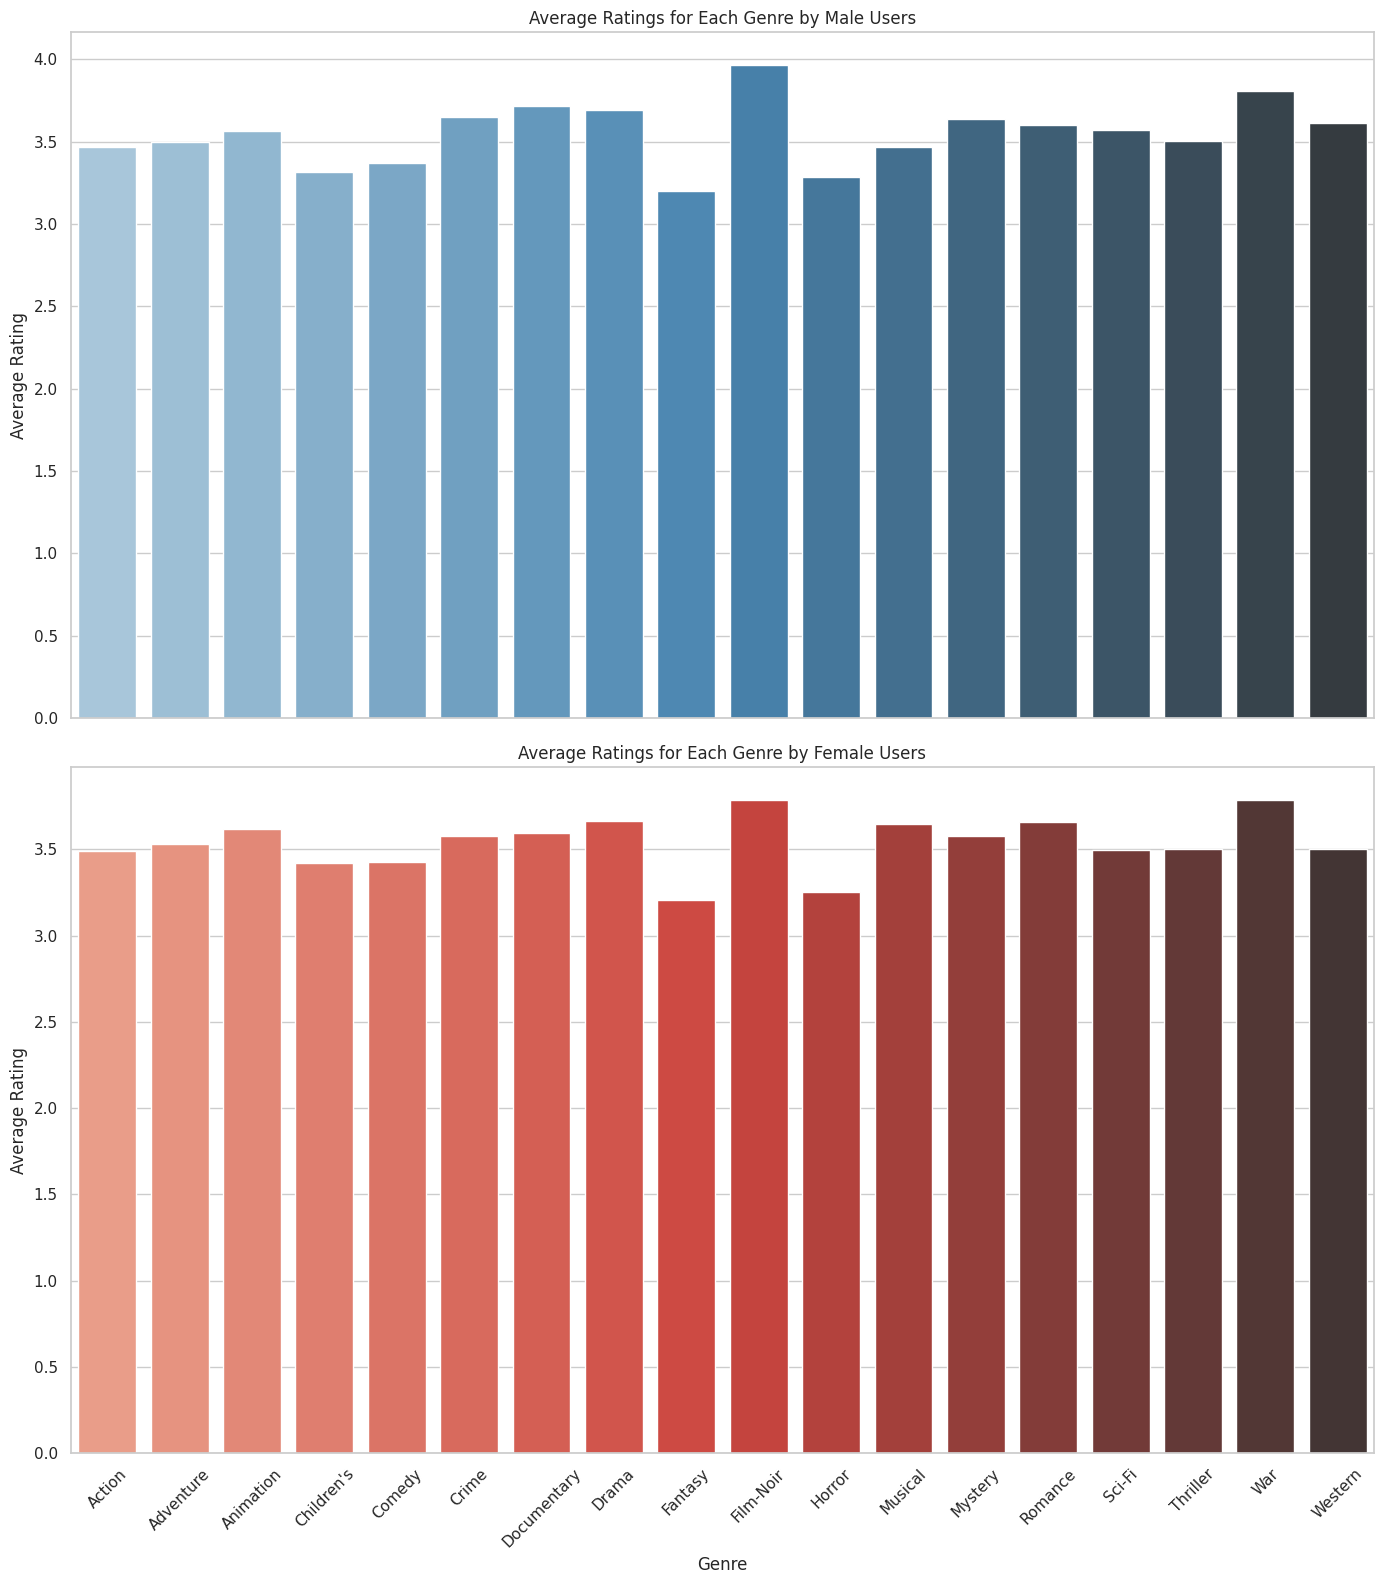

In [53]:

# List of columns representing movie genres
movie_genre_columns = [
    'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Calculate average ratings for each genre by gender
genre_ratings_male = {}
genre_ratings_female = {}

for genre in movie_genre_columns:
    genre_ratings_male[genre] = df_final.loc[(df_final[genre] == 1) & (df_final['gender'] == 'M'), 'rating'].mean()
    genre_ratings_female[genre] = df_final.loc[(df_final[genre] == 1) & (df_final['gender'] == 'F'), 'rating'].mean()

# Convert the dictionaries to DataFrames for plotting
genre_ratings_male_df = pd.DataFrame(list(genre_ratings_male.items()), columns=['Genre', 'Average Rating (Male)'])
genre_ratings_female_df = pd.DataFrame(list(genre_ratings_female.items()), columns=['Genre', 'Average Rating (Female)'])

# Plot the average ratings for each genre by gender
fig, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

sns.barplot(ax=axes[0], x='Genre', y='Average Rating (Male)', data=genre_ratings_male_df, palette='Blues_d')
axes[0].set_title('Average Ratings for Each Genre by Male Users')
axes[0].set_xlabel('')
axes[0].set_ylabel('Average Rating')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='Genre', y='Average Rating (Female)', data=genre_ratings_female_df, palette='Reds_d')
axes[1].set_title('Average Ratings for Each Genre by Female Users')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Average Rating')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### we see that both male and female like film-noir and war the most 

In [54]:
df_final["gender"].value_counts()

gender
M    63736
F    23884
Name: count, dtype: int64

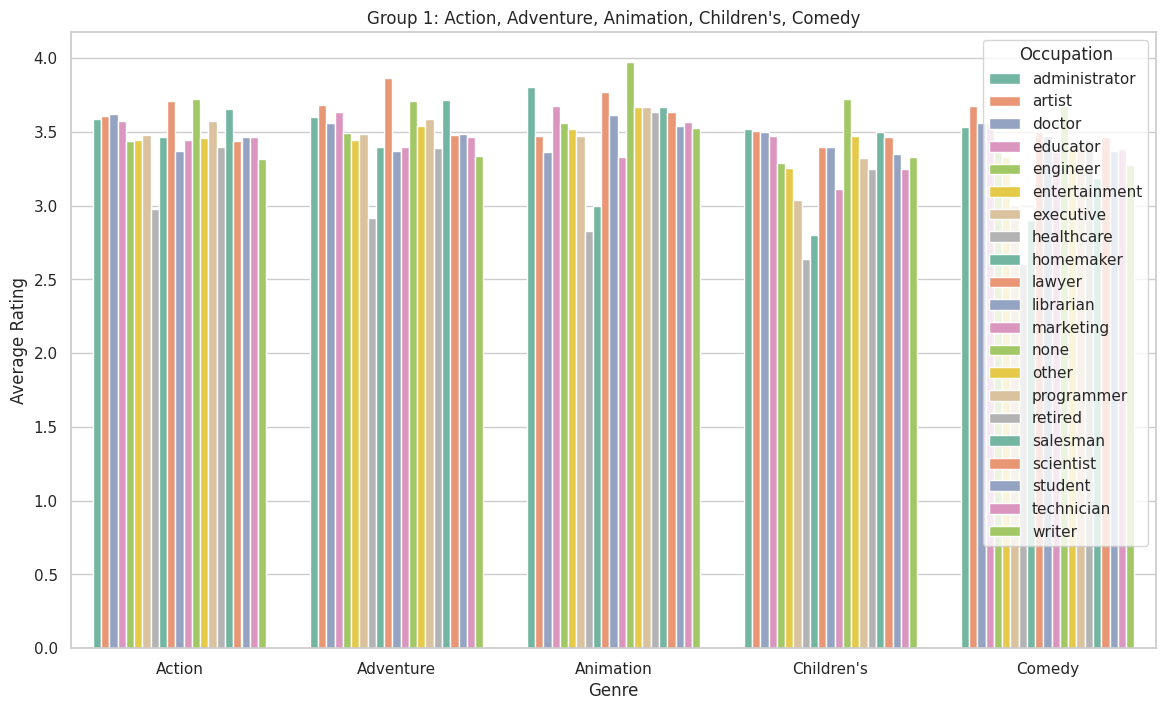

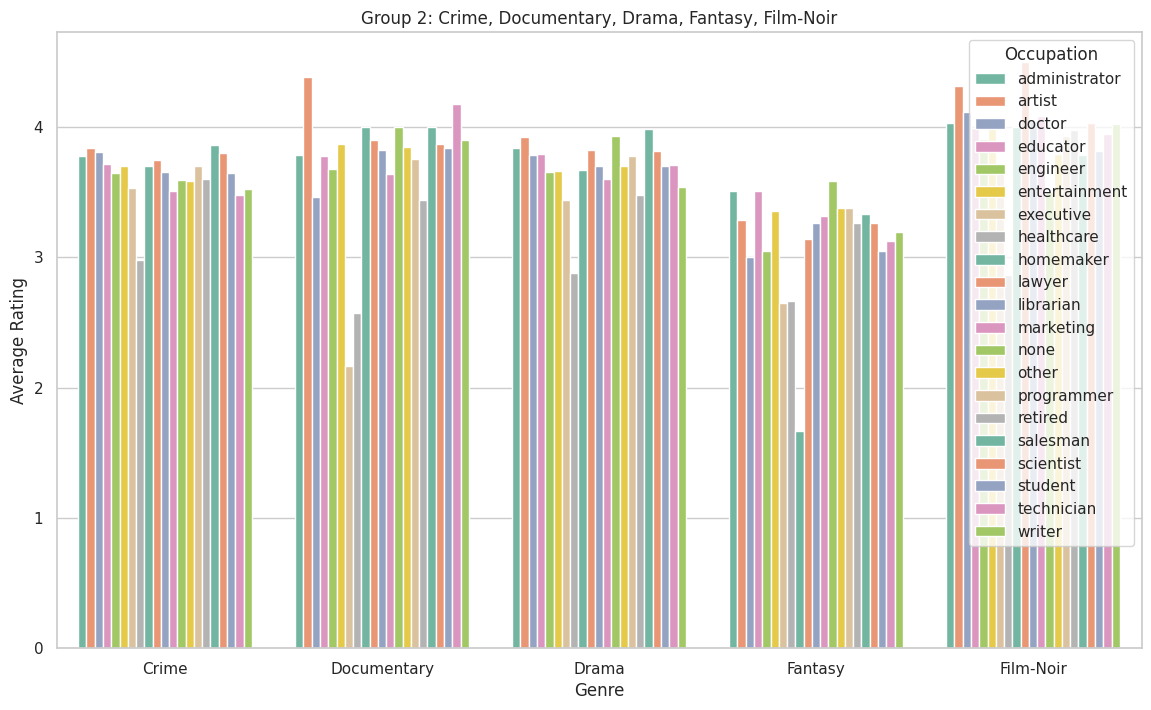

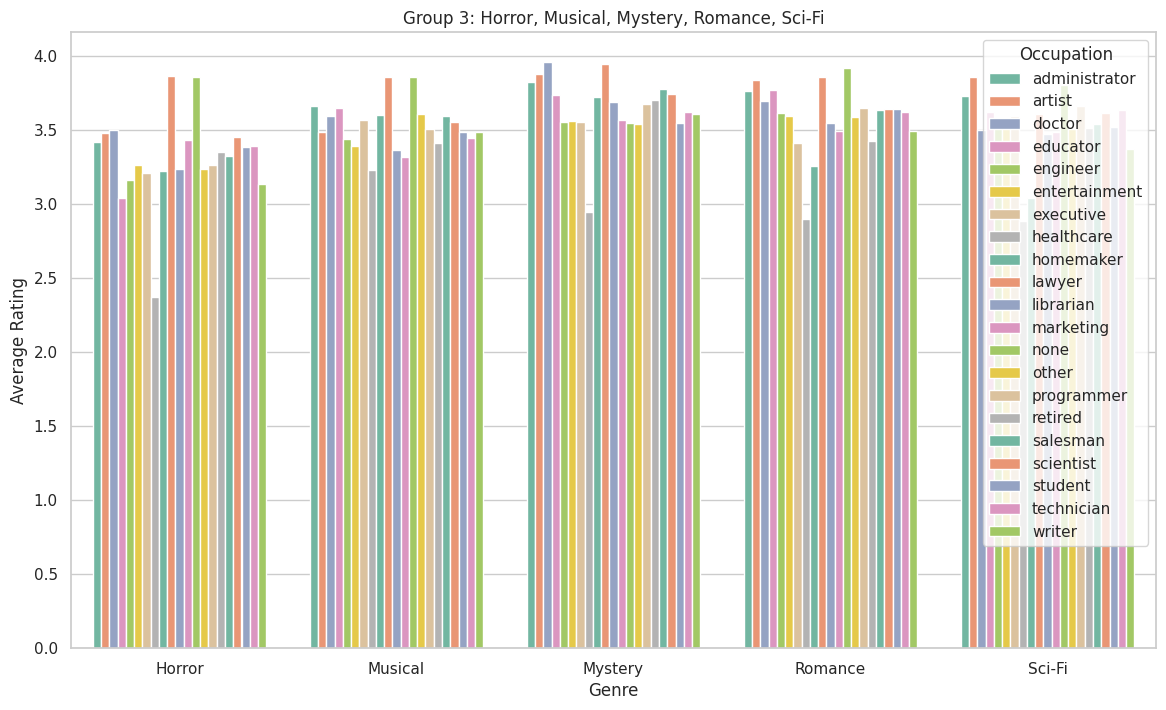

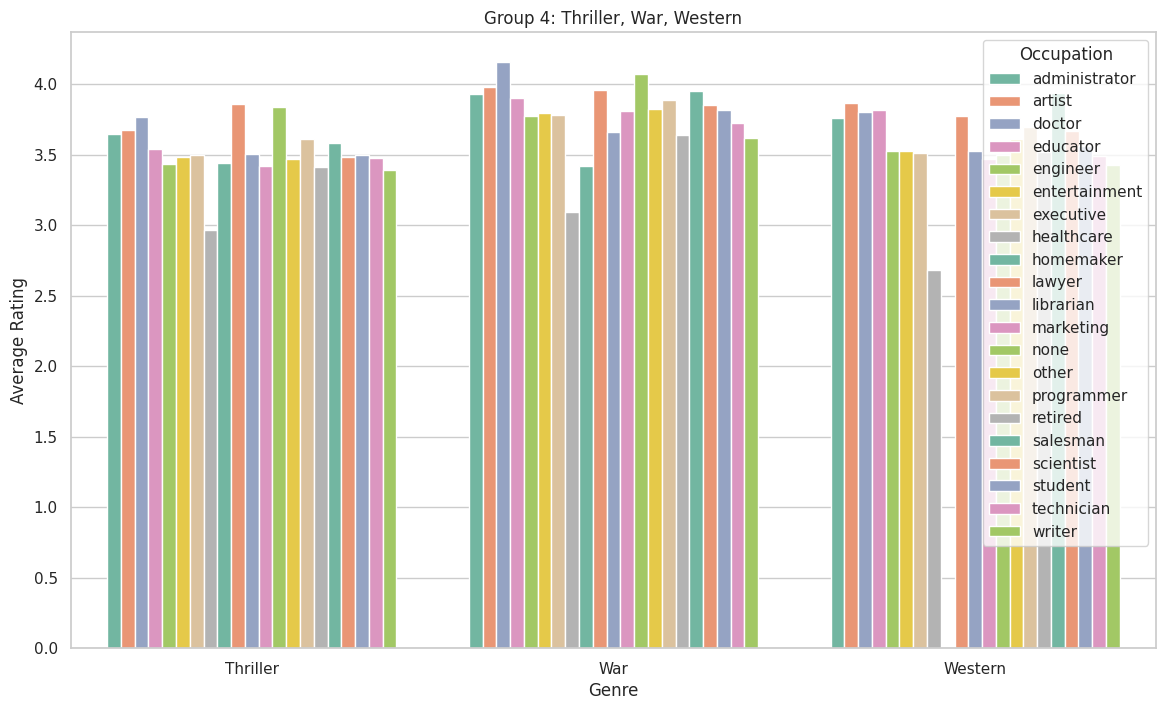

In [55]:

# Function to plot genre preferences by occupation
def plot_genre_preferences(genre_list, title):
    genre_ratings = []
    for genre in genre_list:
        ratings = df_final[df_final[genre] == 1].groupby('occupation')['rating'].mean().reset_index()
        ratings['Genre'] = genre
        genre_ratings.append(ratings)
    
    genre_ratings_df = pd.concat(genre_ratings, ignore_index=True)

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Genre', y='rating', hue='occupation', data=genre_ratings_df, palette='Set2')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Average Rating')
    plt.legend(title='Occupation')
    plt.show()

# Define genre groups
genre_groups = {
    'Group 1: Action, Adventure, Animation, Children\'s, Comedy': ['Action', 'Adventure', 'Animation', "Children's", 'Comedy'],
    'Group 2: Crime, Documentary, Drama, Fantasy, Film-Noir': ['Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir'],
    'Group 3: Horror, Musical, Mystery, Romance, Sci-Fi': ['Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi'],
    'Group 4: Thriller, War, Western': ['Thriller', 'War', 'Western']
}

# Plot each group
for title, genres in genre_groups.items():
    plot_genre_preferences(genres, title)


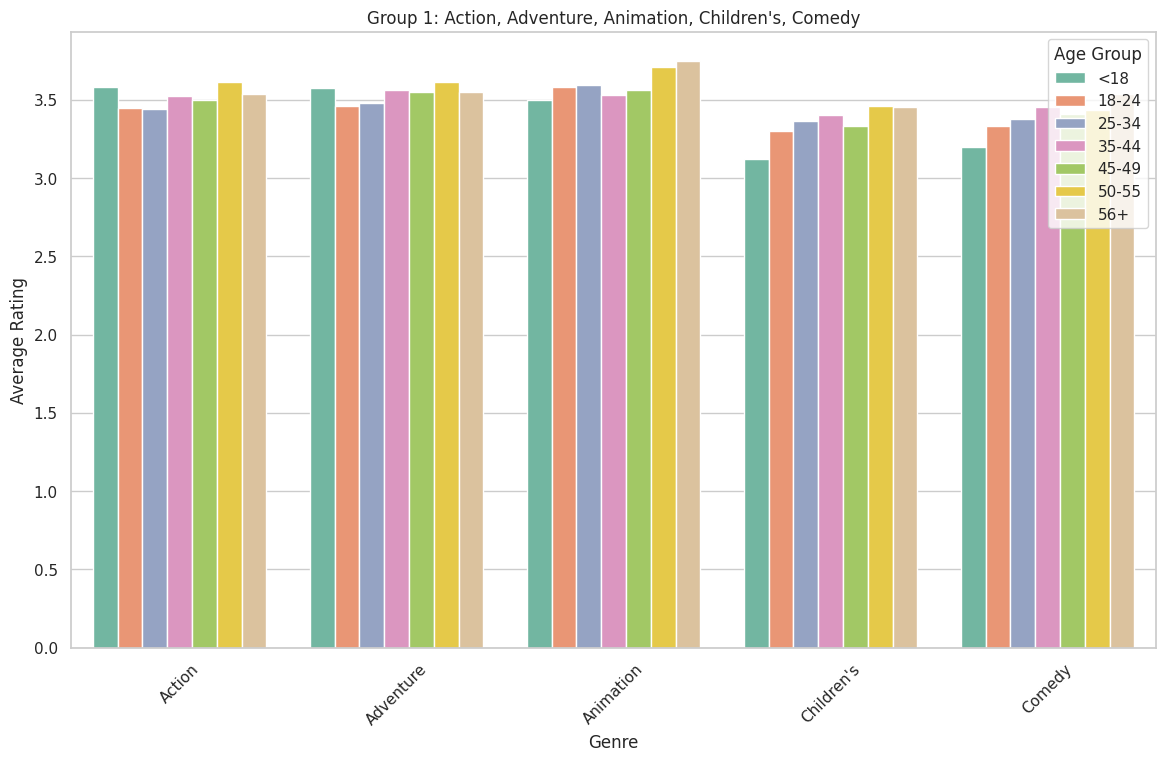

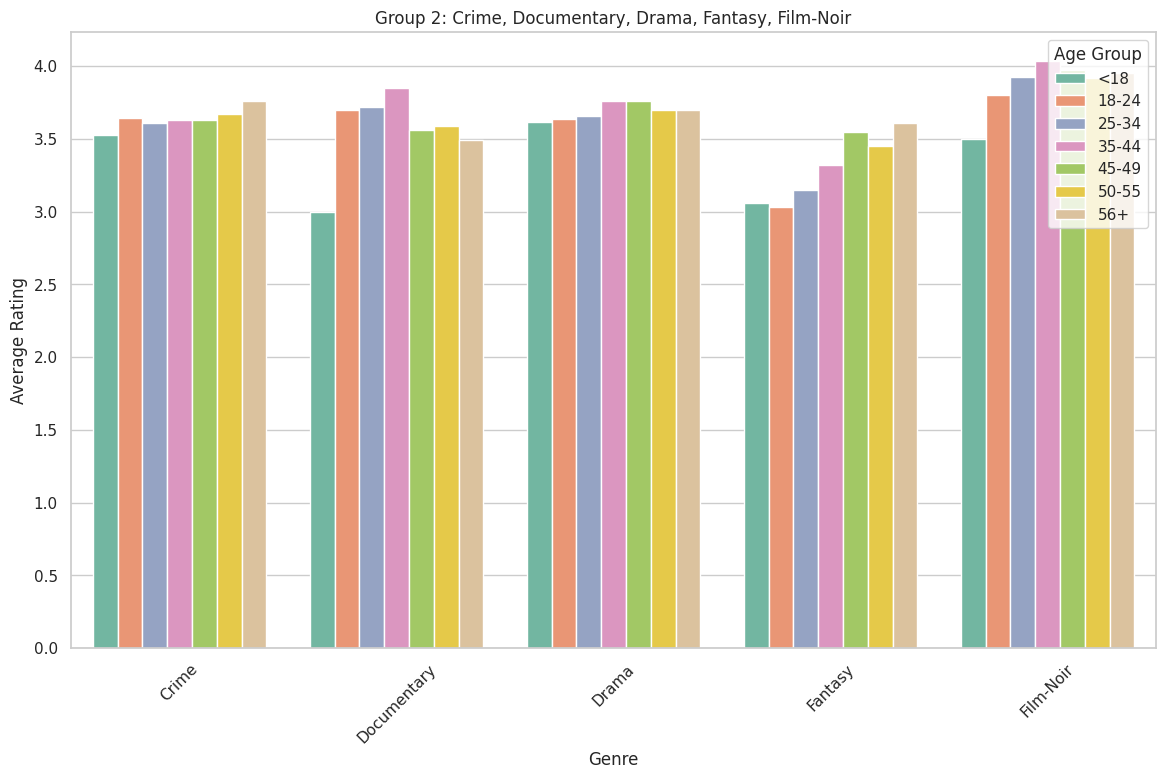

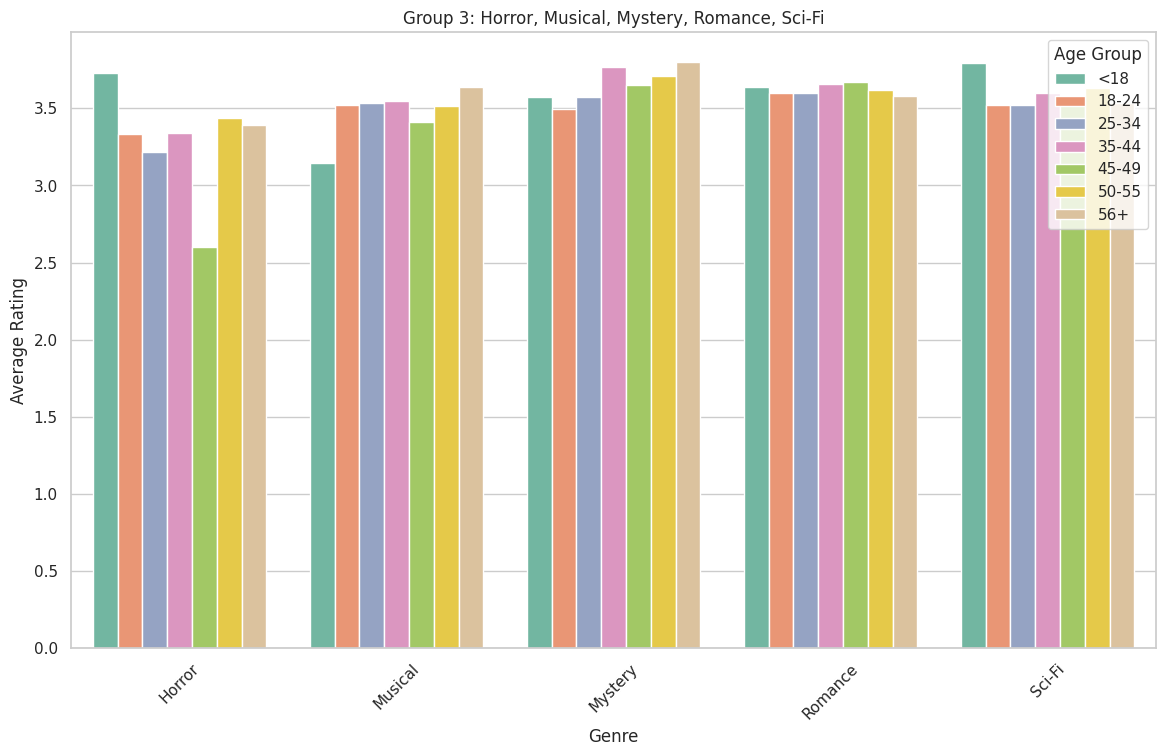

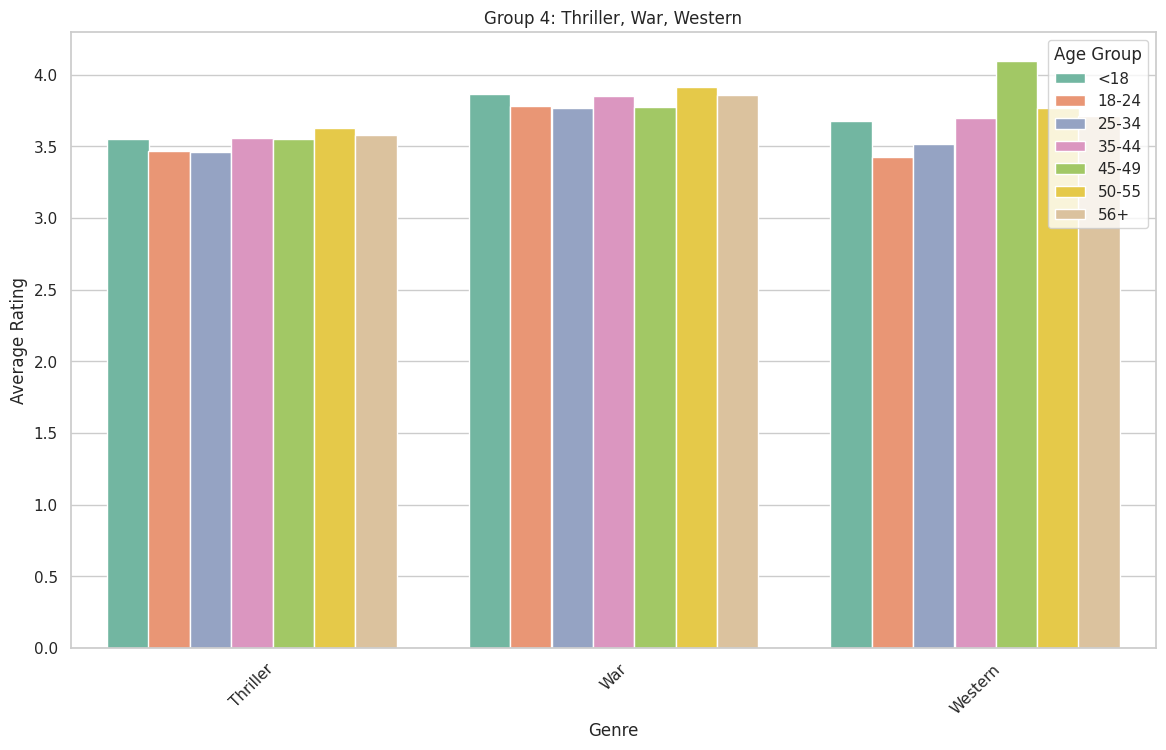

In [56]:

# Define age groups
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Function to plot genre preferences by age group
def plot_genre_preferences(genre_list, title):
    genre_ratings = []
    for genre in genre_list:
        ratings = df_final[df_final[genre] == 1].groupby('age_group', observed=True)['rating'].mean().reset_index()
        ratings['Genre'] = genre
        genre_ratings.append(ratings)
    
    genre_ratings_df = pd.concat(genre_ratings, ignore_index=True)

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Genre', y='rating', hue='age_group', data=genre_ratings_df, palette='Set2')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Average Rating')
    plt.legend(title='Age Group')
    plt.xticks(rotation=45)
    plt.show()

# Define genre groups
genre_groups = {
    'Group 1: Action, Adventure, Animation, Children\'s, Comedy': ['Action', 'Adventure', 'Animation', "Children's", 'Comedy'],
    'Group 2: Crime, Documentary, Drama, Fantasy, Film-Noir': ['Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir'],
    'Group 3: Horror, Musical, Mystery, Romance, Sci-Fi': ['Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi'],
    'Group 4: Thriller, War, Western': ['Thriller', 'War', 'Western']
}

# Plot each group
for title, genres in genre_groups.items():
    plot_genre_preferences(genres, title)


### Implementing collaborative filtering system

In [57]:
!pip uninstall pyspark -y
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.4-py2.py3-none-any.whl size=317849765 sha256=7d4e02aeda0e2514b26e0a4187909f3bbe0c5fb90794ec81a19b6908b023cc1d
  Stored in directory: /root/.cache/pip/wheels/d9/1c/98/31e395a42d1735d18d42124971ecbbade844b50bb9845b6f4a
Successfully built pyspark


In [58]:
!pip install recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.3/355.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.

In [59]:
!pip install pandera

In [60]:
pip install --upgrade pandera


Note: you may need to restart the kernel to use updated packages.


In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
import pyspark.sql.functions as F
from pyspark.sql.functions import col
from pyspark.ml.tuning import CrossValidator
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import FloatType, IntegerType, LongType

from recommenders.utils.spark_utils import start_or_get_spark
from recommenders.evaluation.spark_evaluation import SparkRankingEvaluation, SparkRatingEvaluation
from recommenders.tuning.parameter_sweep import generate_param_grid
from recommenders.datasets.spark_splitters import spark_random_split

print(f"System version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"PySpark version: {pyspark.__version__}")

System version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
Pandas version: 2.2.3
PySpark version: 3.5.4


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [63]:
MOVIELENS_DATA_SIZE = "100k"

COL_USER = "user_id"
COL_ITEM = "movie_id"
COL_RATING = "rating"
COL_PREDICTION = "prediction"
COL_TIMESTAMP = "timestamp"

In [64]:
schema = StructType(
    (
        StructField(COL_USER, IntegerType()),
        StructField(COL_ITEM, IntegerType()),
        StructField(COL_RATING, FloatType()),
        StructField(COL_TIMESTAMP, LongType()),
    )
)

In [65]:
RANK = 10
MAX_ITER = 15
REG_PARAM = 0.05

In [66]:
K = 10

In [67]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Pandas to Spark DataFrame") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/24 18:21:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [68]:
# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df)
print("Spark DataFrame:")
spark_df.show()

Spark DataFrame:


+-------+--------+------+---------+
|user_id|movie_id|rating|timestamp|
+-------+--------+------+---------+
|    196|     242|     3|881250949|
|    186|     302|     3|891717742|
|     22|     377|     1|878887116|
|    244|      51|     2|880606923|
|    166|     346|     1|886397596|
|    298|     474|     4|884182806|
|    115|     265|     2|881171488|
|    253|     465|     5|891628467|
|    305|     451|     3|886324817|
|      6|      86|     3|883603013|
|     62|     257|     2|879372434|
|    286|    1014|     5|879781125|
|    200|     222|     5|876042340|
|    210|      40|     3|891035994|
|    224|      29|     3|888104457|
|    303|     785|     3|879485318|
|    122|     387|     5|879270459|
|    194|     274|     2|879539794|
|    291|    1042|     4|874834944|
|    234|    1184|     2|892079237|
+-------+--------+------+---------+
only showing top 20 rows



In [69]:
spark_df.show(5)

+-------+--------+------+---------+
|user_id|movie_id|rating|timestamp|
+-------+--------+------+---------+
|    196|     242|     3|881250949|
|    186|     302|     3|891717742|
|     22|     377|     1|878887116|
|    244|      51|     2|880606923|
|    166|     346|     1|886397596|
+-------+--------+------+---------+
only showing top 5 rows



In [70]:
dfs_train, dfs_test = spark_random_split(spark_df, ratio=0.75, seed=42)

In [71]:
als = ALS(
    maxIter=MAX_ITER, 
    rank=RANK,
    regParam=REG_PARAM, 
    userCol=COL_USER, 
    itemCol=COL_ITEM, 
    ratingCol=COL_RATING, 
    coldStartStrategy="drop"
)

model = als.fit(dfs_train)

In [72]:
dfs_pred = model.transform(dfs_test).drop(COL_RATING)

In [73]:
evaluations = SparkRatingEvaluation(
    dfs_test, 
    dfs_pred,
    col_user=COL_USER,
    col_item=COL_ITEM,
    col_rating=COL_RATING,
    col_prediction=COL_PREDICTION
)

print(
    "RMSE score = {}".format(evaluations.rmse()),
    "MAE score = {}".format(evaluations.mae()),
    "R2 score = {}".format(evaluations.rsquared()),
    "Explained variance score = {}".format(evaluations.exp_var()),
    sep="\n"
)

RMSE score = 0.9662965809658195
MAE score = 0.75212764136672
R2 score = 0.2547224504457646
Explained variance score = 0.2611415703579607


In [74]:
# Get the cross join of all user-item pairs and score them.
users = dfs_train.select(COL_USER).distinct()
items = dfs_train.select(COL_ITEM).distinct()
user_item = users.crossJoin(items)
dfs_pred = model.transform(user_item)

# Remove seen items.
dfs_pred_exclude_train = dfs_pred.alias("pred").join(
    dfs_train.alias("train"),
    (col("pred." + COL_USER) == col("train." + COL_USER)) & (col("pred." + COL_ITEM) == col("train." + COL_ITEM)),
    how='left_outer'  # outer might create unnecessary rows, using left_outer to match join logic correctly
)

# Filter out seen items
dfs_pred_final = dfs_pred_exclude_train.filter(col("train.rating").isNull()) \
    .select('pred.' + COL_USER, 'pred.' + COL_ITEM, 'pred.' + "prediction")

dfs_pred_final.show()


+-------+--------+----------+
|user_id|movie_id|prediction|
+-------+--------+----------+
|     68|     474|  4.269253|
|    352|     474| 3.3421543|
|     37|     474| 3.5165148|
|    329|     474| 3.7859862|
|    172|     474| 2.8836067|
|    698|     474|  2.548455|
|    761|     474| 2.0477974|
|    209|      29| 2.0934355|
|    309|      29| 2.2145128|
|    431|      29|  3.015169|
|    888|      29|  3.027264|
|    203|      26| 2.7931635|
|    358|      26| 2.7480688|
|    261|      26| 2.6111755|
|    762|      26| 3.9490378|
|    543|      26| 3.1534326|
|    657|      26| 3.5811024|
|    506|      26|  3.353761|
|    869|      26| 3.2668805|
|    780|      26|  2.591413|
+-------+--------+----------+
only showing top 20 rows



In [75]:
evaluations = SparkRankingEvaluation(
    dfs_test, 
    dfs_pred_final,
    col_user=COL_USER,
    col_item=COL_ITEM,
    col_rating=COL_RATING,
    col_prediction=COL_PREDICTION,
    k=K
)

print(
    "Precision@k = {}".format(evaluations.precision_at_k()),
    "Recall@k = {}".format(evaluations.recall_at_k()),
    "NDCG@k = {}".format(evaluations.ndcg_at_k()),
    "Mean average precision = {}".format(evaluations.map_at_k()),
    sep="\n"
)

Precision@k = 0.046178343949044506
Recall@k = 0.016672788629730862
NDCG@k = 0.04147569085518637
Mean average precision = 0.014636917399656266


In [76]:
param_dict = {
    "rank": [10, 15, 20],
    "regParam": [0.001, 0.1, 1.0]
}

In [77]:
param_grid = generate_param_grid(param_dict)

In [78]:
rmse_scores = []
r2_scores = []

for g in param_grid:
    als = ALS(        
        userCol=COL_USER, 
        itemCol=COL_ITEM, 
        ratingCol=COL_RATING, 
        coldStartStrategy="drop",
        **g
    )
    
    model = als.fit(dfs_train)
    
    dfs_pred = model.transform(dfs_test).drop(COL_RATING)
    
    # Evaluations for RMSE
    evaluations = SparkRatingEvaluation(
        dfs_test, 
        dfs_pred,
        col_user=COL_USER,
        col_item=COL_ITEM,
        col_rating=COL_RATING,
        col_prediction=COL_PREDICTION
    )
    
    rmse_scores.append(evaluations.rmse())
    
    # Join predictions with true ratings for alignment
    dfs_pred_aligned = dfs_pred.alias("pred").join(
        dfs_test.alias("true"),
        (col("pred." + COL_USER) == col("true." + COL_USER)) & (col("pred." + COL_ITEM) == col("true." + COL_ITEM))
    ).select(col("true." + COL_RATING), col("pred." + COL_PREDICTION))
    
    # Collect aligned true ratings and predictions
    true_ratings = dfs_pred_aligned.select(COL_RATING).rdd.flatMap(lambda x: x).collect()
    pred_ratings = dfs_pred_aligned.select(COL_PREDICTION).rdd.flatMap(lambda x: x).collect()
    
    # Calculate R² score
    mean_true_ratings = np.mean(true_ratings)
    ss_total = sum((x - mean_true_ratings) ** 2 for x in true_ratings)
    ss_residual = sum((true_ratings[i] - pred_ratings[i]) ** 2 for i in range(len(true_ratings)))
    r2_score = 1 - (ss_residual / ss_total)
    
    r2_scores.append(r2_score)

# Format scores
rmse_scores = [float('%.4f' % x) for x in rmse_scores]
r2_scores = [float('%.4f' % x) for x in r2_scores]

rmse_score_array = np.reshape(rmse_scores, (len(param_dict["rank"]), len(param_dict["regParam"])))
r2_score_array = np.reshape(r2_scores, (len(param_dict["rank"]), len(param_dict["regParam"])))

print("RMSE Scores:", rmse_score_array)
print("R² Scores:", r2_score_array)


RMSE Scores: [[1.3227 0.927  1.3792]
 [1.4697 0.9306 1.3792]
 [1.5478 0.9296 1.3792]]
R² Scores: [[-0.3965  0.3142 -0.5182]
 [-0.724   0.3088 -0.5182]
 [-1.7839 -0.4308 -0.9813]]


In [79]:
rmse_df = pd.DataFrame(data=rmse_score_array, index=pd.Index(param_dict["rank"], name="rank"), 
                       columns=pd.Index(param_dict["regParam"], name="reg. parameter"))

In [80]:
r2_df=pd.DataFrame(data=r2_score_array, index=pd.Index(param_dict["rank"], name="rank"), 
                       columns=pd.Index(param_dict["regParam"], name="reg. parameter"))

<Axes: xlabel='reg. parameter', ylabel='rank'>

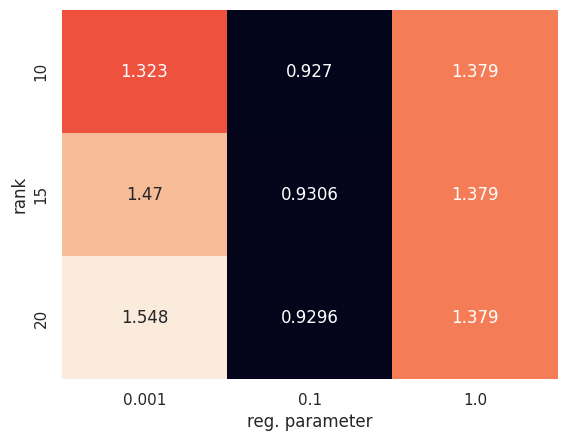

In [81]:
fig, ax = plt.subplots()
sns.heatmap(rmse_df, cbar=False, annot=True, fmt=".4g")

<Axes: xlabel='reg. parameter', ylabel='rank'>

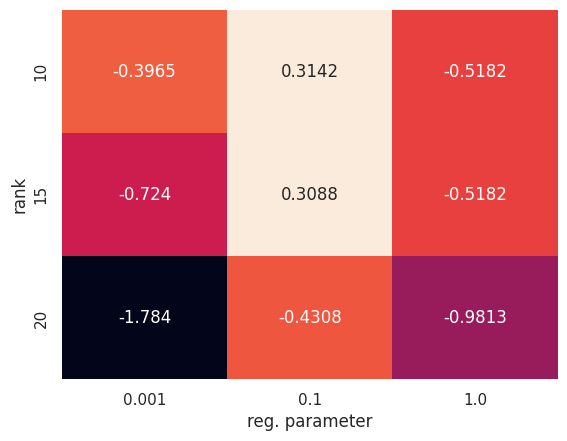

In [82]:
fig, ax = plt.subplots()
sns.heatmap(r2_df, cbar=False, annot=True, fmt=".4g")

In [83]:
dfs_rec = model.recommendForAllUsers(10)

In [84]:
dfs_rec.show(10)

+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|      1|[{814, 3.851576},...|
|      3|[{814, 3.1814926}...|
|      5|[{814, 3.0953865}...|
|      6|[{814, 3.7486985}...|
|      9|[{814, 4.2719946}...|
|     12|[{814, 4.381902},...|
|     13|[{814, 3.4292662}...|
|     15|[{814, 3.153397},...|
|     16|[{814, 4.4446397}...|
|     17|[{814, 3.307258},...|
+-------+--------------------+
only showing top 10 rows



In [85]:
users = dfs_train.select(als.getUserCol()).distinct().limit(3)

dfs_rec_subset = model.recommendForUserSubset(users, 10)

In [86]:
dfs_rec_subset.show(10)

+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|    474|[{814, 4.156718},...|
|     26|[{814, 3.1375165}...|
|     29|[{814, 3.82061}, ...|
+-------+--------------------+



In [87]:
# cleanup spark instance
spark.stop()

### Collaborative filtering Bayesian Personalized Ranking (BPR)

In [88]:
import os
import sys
import cornac
import pandas as pd

from recommenders.datasets.python_splitters import python_random_split
from recommenders.evaluation.python_evaluation import map, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac.cornac_utils import predict_ranking
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED
from recommenders.utils.notebook_utils import store_metadata

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

System version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
Cornac version: 2.3.0


In [89]:
# Select MovieLens data size: 100k, 1m, 10m, or 20m
MOVIELENS_DATA_SIZE = '100k'

# top k items to recommend
TOP_K = 10

# Model parameters
NUM_FACTORS = 200
NUM_EPOCHS = 100

In [90]:
df_2=df[["user_id","movie_id","rating"]]

In [91]:
train, test = python_random_split(df_2, 0.75)

In [92]:
from cornac.data import Dataset
train_set = Dataset.from_uir(train.itertuples(index=False), seed=SEED) 
print('Number of users: {}'.format(train_set.num_users)) 
print('Number of items: {}'.format(train_set.num_items))

Number of users: 943
Number of items: 1642


In [93]:
bpr = cornac.models.BPR(
    k=NUM_FACTORS,
    max_iter=NUM_EPOCHS,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=SEED
)

In [94]:
with Timer() as t:
    bpr.fit(train_set)
print("Took {} seconds for training.".format(t))

  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Took 2.8900 seconds for training.


In [95]:
with Timer() as t:
    all_predictions = predict_ranking(bpr, train, usercol='user_id', itemcol='movie_id', remove_seen=True)
print("Took {} seconds for prediction.".format(t))

Took 1.6847 seconds for prediction.


In [96]:
all_predictions.head()

,user_id,movie_id,prediction
0,1,1,3.917794
3,1,4,2.972839
5,1,6,-0.691013
7,1,8,2.865882
9,1,10,1.761243


In [97]:
from recommenders.evaluation.python_evaluation import (
    map, ndcg_at_k, precision_at_k, recall_at_k
)

# Define the evaluation metric
k = 10

# Evaluate the predictions
eval_map = map(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)
eval_ndcg = ndcg_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)
eval_precision = precision_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)
eval_recall = recall_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)

# Print the evaluation results
print("MAP:\t%f" % eval_map,
      "NDCG:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


MAP:	0.110293
NDCG:	0.407024
Precision@K:	0.359873
Recall@K:	0.183517


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 32)        │     38,048 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 32)        │     42,144 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalization_l… │ (None, 32)        │          0 │ sequential[0][0]  │
│ (L2NormalizationLa… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalization_l… │ (None, 32)        │          0 │ sequential_1[0][… │
│ (L2NormalizationLa… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ l2_normalization… │
│                     │                   │            │ l2_normalization… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 80,192 (313.25 KB)

 Trainable params: 80,192 (313.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


I0000 00:00:1735064681.653358    2031 service.cc:145] XLA service 0x7fc7500068d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735064681.653396    2031 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1735064681.653399    2031 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  95/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5701

I0000 00:00:1735064687.787979    2031 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 8.0860
Epoch 2/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6478
Epoch 3/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6681
Epoch 4/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6616
Epoch 5/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6176
Epoch 6/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6668
Epoch 7/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6421
Epoch 8/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6571
Epoch 9/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6335
Epoch 10/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6529
Epoch 11/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6352
Epoch 12/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6474
Epoch 13/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6589
Epoch 14/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6508
Epoch 15/30
1096/1096 ━━━━━━━━━━━━━━━━━

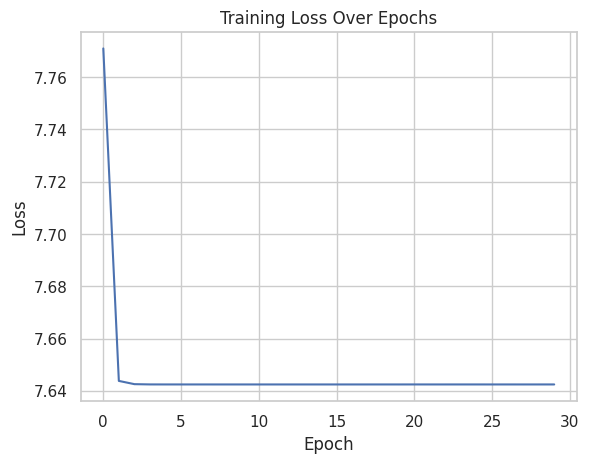

548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.7005
Test Loss: 7.682150363922119
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAP: 0.012561
NDCG: 0.125610
Precision@K: 0.012561
Recall@K: 0.002339


In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

# Load and prepare data
# df_final = pd.read_csv('your_dataframe.csv')  # Uncomment if loading data from a file

# Prepare user and item features
y = df_final['rating']
user_features = ['age', 'gender', 'occupation']
item_features = ['days_since_release'] + ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

user_data = df_final[user_features]
item_data = df_final[item_features]

# Convert categorical data
user_data.loc[:, 'gender'] = user_data['gender'].astype('category').cat.codes
user_data.loc[:, 'occupation'] = user_data['occupation'].astype('category').cat.codes

# Convert to float32
user_data = user_data.astype(np.float32)
item_data = item_data.astype(np.float32)
y = y.astype(np.float32)

# Split the data
user_train, user_test, item_train, item_test, y_train, y_test = train_test_split(user_data, item_data, y, test_size=0.2, random_state=1)

# Standard scaling
scalerItem = StandardScaler()
item_train = scalerItem.fit_transform(item_train)
item_test = scalerItem.transform(item_test)

scalerUser = StandardScaler()
user_train = scalerUser.fit_transform(user_train)
user_test = scalerUser.transform(user_test)

# Define neural networks
num_outputs = 32

user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
])

class L2NormalizationLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.linalg.l2_normalize(inputs, axis=1)

input_user = tf.keras.layers.Input(shape=(user_train.shape[1],))
input_item = tf.keras.layers.Input(shape=(item_train.shape[1],))

vu = user_NN(input_user)
vu = L2NormalizationLayer()(vu)
vm = item_NN(input_item)
vm = L2NormalizationLayer()(vm)

output = tf.keras.layers.Dot(axes=1)([vu, vm])

model = Model([input_user, input_item], output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

model.summary()

# Train the model
history = model.fit([user_train, item_train], y_train, batch_size=64, epochs=30)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

# Evaluate model
test_loss = model.evaluate([user_test, item_test], y_test)
print(f'Test Loss: {test_loss}')

# Generate predictions
predictions = model.predict([user_test, item_test])

# Define metric functions
def mean_average_precision_at_k(actual, predicted, k=10):
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        hits, sum_precisions = 0.0, 0.0
        for i, p in enumerate(predicted_list):
            if p in actual_list and p not in predicted_list[:i]:
                hits += 1.0
                sum_precisions += hits / (i + 1.0)
        if actual_list:
            score += sum_precisions / min(len(actual_list), k)
    return score / num_users

def ndcg_at_k(actual, predicted, k=10):
    def dcg(relevance_scores):
        return np.sum(relevance_scores / np.log2(np.arange(2, len(relevance_scores) + 2)))
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        relevance_scores = [(1 if p in actual_list else 0) for p in predicted_list]
        ideal_relevance_scores = sorted(relevance_scores, reverse=True)
        dcg_max = dcg(ideal_relevance_scores)
        if dcg_max == 0:
            score += 0
        else:
            score += dcg(relevance_scores) / dcg_max
    return score / num_users

def precision_at_k(actual, predicted, k=10):
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        score += len(set(predicted_list) & set(actual_list)) / float(k)
    return score / num_users

def recall_at_k(actual, predicted, k=10):
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        score += len(set(predicted_list) & set(actual_list)) / float(len(actual_list))
    return score / num_users

# Assuming you have actual and predicted lists prepared
user_relevant_items = df_final.groupby('user_id')['movie_id'].apply(list).to_dict()
actual = [user_relevant_items[user_id] if user_id in user_relevant_items else [] for user_id in df_final['user_id'].unique()]

predicted = []
for user_index in range(len(user_test)):
    user_predictions = predictions[user_index]
    top_k_item_indices = np.argsort(-user_predictions)[:10]
    top_k_items = [df_final['movie_id'].unique()[i] for i in top_k_item_indices]
    predicted.append(top_k_items)

# Compute and display metrics
map_score = mean_average_precision_at_k(actual, predicted, k=10)
ndcg_score = ndcg_at_k(actual, predicted, k=10)
precision_k_score = precision_at_k(actual, predicted, k=10)
recall_k_score = recall_at_k(actual, predicted, k=10)

print(f'MAP: {map_score:.6f}')
print(f'NDCG: {ndcg_score:.6f}')
print(f'Precision@K: {precision_k_score:.6f}')
print(f'Recall@K: {recall_k_score:.6f}')
